##Working with Dask

In [ ]:
## Task 1

In [12]:
# import statements
import os
import dask
from dask.distributed import Client
import dask.dataframe as dd
import pandas as pd
import glob

## Task 2

In [13]:

filename = os.path.join('nycflights','*.csv')
filename

'nycflights\\*.csv'

In [14]:
ddf = dd.read_csv(filename)
pdf = pd.concat(map(pd.read_csv, glob.glob('nycflights/*.csv')))

In [15]:
ddf


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,,,
,int64,int64,int64,int64,float64,int64,float64,int64,object,int64,float64,float64,int64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [16]:
pdf

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269176,1999,12,27,1,1645.0,1645,1830.0,1901,UA,1753,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,0,0
269177,1999,12,28,2,1726.0,1645,1928.0,1901,UA,1753,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,0,0
269178,1999,12,29,3,1646.0,1645,1846.0,1901,UA,1753,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,0,0
269179,1999,12,30,4,1651.0,1645,1908.0,1901,UA,1753,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,0,0


## Task 3

In [17]:
ddf.head()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


## Task 4

In [18]:
%timeit ddf = dd.read_csv(filename)

20.8 ms ± 493 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
%timeit pdf = pd.concat(map(pd.read_csv,glob.glob('nycflights/*.csv')))

5.11 s ± 81.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Task 5

In [20]:
ddf.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted'],
      dtype='object')

In [21]:
ddf.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum              float64
ActualElapsedTime    float64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
Diverted               int64
dtype: object

## Task 6

In [22]:
len(ddf)


ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+----------------+---------+----------+
| Column         | Found   | Expected |
+----------------+---------+----------+
| CRSElapsedTime | float64 | int64    |
| TailNum        | object  | float64  |
+----------------+---------+----------+

The following columns also raised exceptions on conversion:

- TailNum
  ValueError("could not convert string to float: 'N14346'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'CRSElapsedTime': 'float64',
       'TailNum': 'object'}

to the call to `read_csv`/`read_table`.

## Task 7

In [23]:
ddf = dd.read_csv(filename, parse_dates={'Date': [0,1,2]},dtype = {'CRSElapsedTime':'float64', 'TailNum': 'object'})

In [24]:
ddf[['CRSElapsedTime', 'TailNum']].sample(frac=0.001).compute()

,CRSElapsedTime,TailNum
143214,134.0,NaN
20493,161.0,NaN
182048,61.0,NaN
223772,157.0,NaN
79338,141.0,NaN
...,...,...
259069,188.0,N17104
54771,128.0,N8944E
197592,61.0,N529DA
257480,217.0,N16713


In [25]:
ddf['TailNum'].compute()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
269176    N516UA
269177    N504UA
269178    N592UA
269179    N575UA
269180    N539UA
Name: TailNum, Length: 2611892, dtype: object

In [26]:
len(ddf)

2611892

In [27]:
ddf.loc[ddf['ArrTime'] < ddf['ArrTime'].mean()].compute()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
88,1990-01-01,1,1205.0,1110,1343.0,1243,US,49,NaN,98.0,...,NaN,60.0,55.0,LGA,CLE,418.0,NaN,NaN,0,0
89,1990-01-02,2,1158.0,1110,1327.0,1243,US,49,NaN,89.0,...,NaN,44.0,48.0,LGA,CLE,418.0,NaN,NaN,0,0
90,1990-01-03,3,1202.0,1110,1324.0,1243,US,49,NaN,82.0,...,NaN,41.0,52.0,LGA,CLE,418.0,NaN,NaN,0,0
91,1990-01-06,6,1126.0,1110,1322.0,1243,US,49,NaN,116.0,...,NaN,39.0,16.0,LGA,CLE,418.0,NaN,NaN,0,0
92,1990-01-07,7,1114.0,1110,1236.0,1243,US,49,NaN,82.0,...,NaN,-7.0,4.0,LGA,CLE,418.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269146,1999-12-27,1,1102.0,1100,1305.0,1311,UA,1685,N515UA,243.0,...,208.0,-6.0,2.0,LGA,DEN,1619.0,10.0,25.0,0,0
269147,1999-12-28,2,1058.0,1100,1305.0,1311,UA,1685,N598UA,247.0,...,221.0,-6.0,-2.0,LGA,DEN,1619.0,6.0,20.0,0,0
269148,1999-12-29,3,1057.0,1100,1308.0,1311,UA,1685,N517UA,251.0,...,218.0,-3.0,-3.0,LGA,DEN,1619.0,5.0,28.0,0,0
269149,1999-12-30,4,1056.0,1100,1312.0,1311,UA,1685,N502UA,256.0,...,227.0,1.0,-4.0,LGA,DEN,1619.0,6.0,23.0,0,0


In [28]:
ddf.iloc[:,[1,3,]].compute()

,DayOfWeek,CRSDepTime
0,1,1540
1,2,1540
2,3,1540
3,4,1540
4,5,1540
...,...,...
269176,1,1645
269177,2,1645
269178,3,1645
269179,4,1645


In [29]:
ddf.iloc[[1, 3,]].compute()

NotImplementedError: 'DataFrame.iloc' only supports selecting columns. It must be used like 'df.iloc[:, column_indexer]'.

## Task 8

In [30]:
ddf_partitions = dd.from_pandas(pdf, npartitions = 10)
ddf_partitions.partitions[1]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,
26119,int64,int64,int64,int64,float64,int64,float64,int64,object,int64,object,float64,float64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
52238,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Task 9

In [31]:
# a)

#x = ddf.notnull().sum()
#x.compute()
ddf.count().compute()

Date                 2611892
DayOfWeek            2611892
DepTime              2540961
CRSDepTime           2611892
ArrTime              2533682
CRSArrTime           2611892
UniqueCarrier        2611892
FlightNum            2611892
TailNum              1298886
ActualElapsedTime    2533682
CRSElapsedTime       2609927
AirTime              1255069
ArrDelay             2533682
DepDelay             2540961
Origin               2611892
Dest                 2611892
Distance             2610397
TaxiIn               1298886
TaxiOut              1298886
Cancelled            2611892
Diverted             2611892
dtype: int64

In [32]:
# b)

y = ddf['Cancelled'].value_counts()
y.compute()


#x = ddf.select_dtypes(include='category').sum()
#x.compute()

0    2540961
1      70931
Name: Cancelled, dtype: int64

In [33]:
# c)

x = ddf['DepDelay'].max()
x.compute()

1435.0

In [34]:
# d)

condition = ddf[ddf['Cancelled']== True]
condition.compute()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
37,1990-01-08,1,NaN,2050,NaN,2203,US,38,NaN,NaN,...,NaN,NaN,NaN,LGA,ORF,296.0,NaN,NaN,1,0
55,1990-01-29,1,NaN,2050,NaN,2203,US,38,NaN,NaN,...,NaN,NaN,NaN,LGA,ORF,296.0,NaN,NaN,1,0
61,1990-01-04,4,NaN,1850,NaN,1948,US,42,NaN,NaN,...,NaN,NaN,NaN,EWR,SYR,194.0,NaN,NaN,1,0
207,1990-01-01,1,NaN,645,NaN,850,US,93,NaN,NaN,...,NaN,NaN,NaN,LGA,IND,659.0,NaN,NaN,1,0
259,1990-01-25,4,NaN,1755,NaN,1942,US,105,NaN,NaN,...,NaN,NaN,NaN,JFK,PIT,340.0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268926,1999-12-20,1,NaN,1846,NaN,2103,UA,1609,UNKNOW,NaN,...,NaN,NaN,NaN,EWR,DEN,1605.0,0.0,0.0,1,0
269031,1999-12-16,4,NaN,615,NaN,829,UA,401,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0
269093,1999-12-14,2,NaN,1650,NaN,1906,UA,785,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0
269153,1999-12-17,5,NaN,1400,NaN,1613,UA,1691,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0


In [35]:
# e)

len(ddf[ddf['Cancelled'] != True])


2540961

In [36]:
# f)
#condition1 = ddf.groupby(('origin')['Cancelled'] != 0).value_counts()
#condition1 = ddf['Origin'].value_counts()
condition1 = ddf[ddf['Cancelled']== False].groupby('Origin').Origin.count()
condition1.compute()

Origin
EWR    1139451
JFK     427243
LGA     974267
Name: Origin, dtype: int64

In [37]:
# g)
ddf.groupby("DayOfWeek").DepDelay.mean().compute()

DayOfWeek
1     8.096565
2     8.149109
3     9.141912
4    10.538275
5    11.476687
6     7.824071
7     8.994296
Name: DepDelay, dtype: float64

In [38]:
# i)
ddf.groupby("Dest").mean().compute()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
Dest,,,,,,,,,,,,,,,,
ABE,4.108108,2050.079208,2057.333333,2132.287129,2120.657658,287.855856,45.376238,44.945946,NaN,4.059406,3.623762,81.864865,NaN,NaN,0.090090,0.000000
ALB,3.708417,1481.815483,1477.235471,1548.797240,1567.336673,1167.013026,51.911890,57.275551,NaN,4.128450,9.460233,136.009018,NaN,NaN,0.055110,0.001002
ATL,3.924395,1344.196306,1334.339468,1553.980467,1567.629763,746.562037,143.551145,143.928799,112.426906,10.897796,11.284661,753.194898,7.375721,24.376770,0.026569,0.001889
BDL,3.905606,1675.710097,1686.297197,1717.392286,1775.034955,616.227610,49.166639,52.407700,22.894286,3.507664,6.779279,109.713756,4.451977,13.381356,0.022068,0.000644
BGR,3.763566,1874.825397,1870.843023,1990.487078,2027.724806,1223.705426,89.427435,94.478682,NaN,9.654076,14.884921,393.000000,NaN,NaN,0.023256,0.001938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AUS,3.846252,1622.537371,1602.738247,1835.125161,1928.479034,592.228717,249.606452,254.711563,206.178065,8.054194,13.168814,1504.000000,4.722999,38.073698,0.013977,0.001271
CRP,4.000000,1894.000000,1830.000000,2223.000000,2190.000000,551.000000,249.000000,280.000000,208.500000,13.000000,44.000000,1597.000000,3.500000,37.000000,0.000000,0.000000
HNL,4.001757,820.956063,809.885764,1287.142096,1281.370826,15.000000,621.207815,632.293497,579.094139,-1.943162,9.101933,4962.000000,4.207381,37.922671,0.000000,0.010545


In [39]:
# i)
ddf.groupby(ddf['Date'].dt.year)[['ActualElapsedTime','Distance']].max().compute()

,ActualElapsedTime,Distance
Date,,
1990,595.0,2586.0
1991,632.0,2586.0
1992,703.0,2586.0
1993,675.0,2586.0
1994,647.0,2586.0
1995,581.0,2586.0
1996,620.0,2586.0
1997,587.0,2586.0
1998,743.0,4962.0


## Task 10

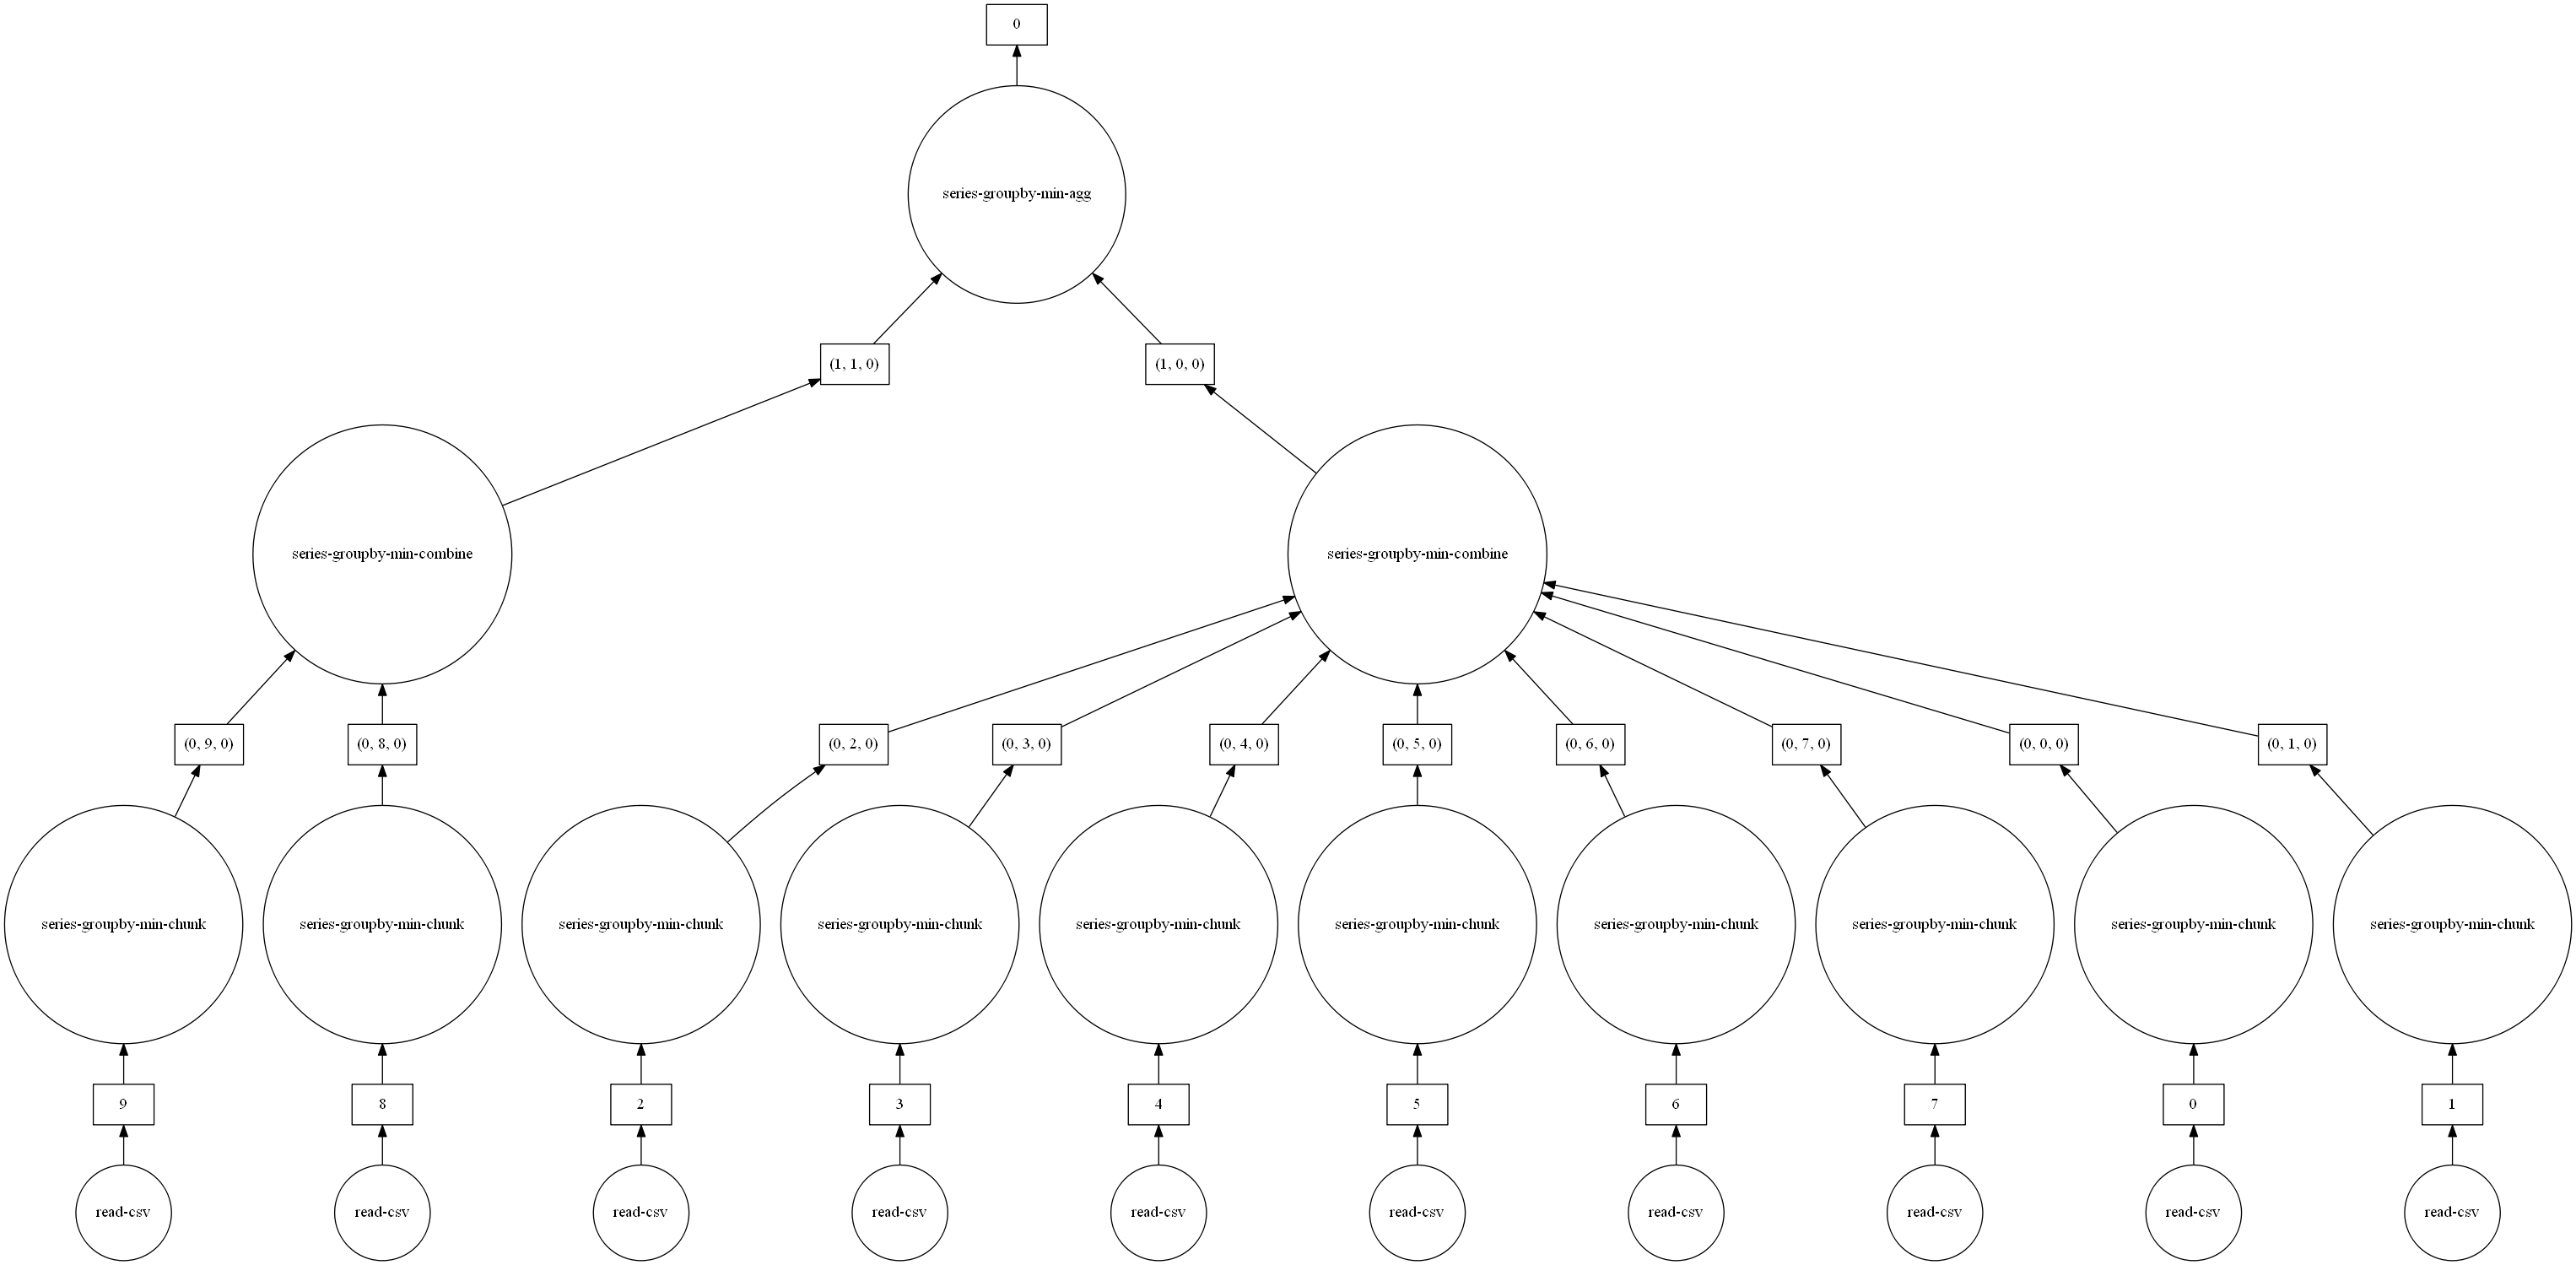

In [40]:
import graphviz
ddf.groupby("Dest")["ArrDelay"].min().visualize()

## Task 11

In [41]:
from dask.distributed import Client

In [42]:
client = Client(n_workers = 4, threads_per_worker = 2, memory_limit ='1GB' )
client
client.cluster

In [43]:
from dask.diagnostics import ProgressBar
ProgressBar().register()

In [44]:
ddf.groupby(ddf['Date'].dt.year) [['ActualElapsedTime','Distance']].max().compute()

,ActualElapsedTime,Distance
Date,,
1990,595.0,2586.0
1991,632.0,2586.0
1992,703.0,2586.0
1993,675.0,2586.0
1994,647.0,2586.0
1995,581.0,2586.0
1996,620.0,2586.0
1997,587.0,2586.0
1998,743.0,4962.0


##  Task 12

In [45]:
x = ddf.groupby(ddf['Date'].dt.year)[['ActualElapsedTime','Distance']].max()
x.compute(scheduler='threads')

[########################################] | 100% Completed |  4.7s


,ActualElapsedTime,Distance
Date,,
1990,595.0,2586.0
1991,632.0,2586.0
1992,703.0,2586.0
1993,675.0,2586.0
1994,647.0,2586.0
1995,581.0,2586.0
1996,620.0,2586.0
1997,587.0,2586.0
1998,743.0,4962.0


In [46]:
with dask.config.set(scheduler='processes'):
    print(x.compute())

[########################################] | 100% Completed |  9.2s
      ActualElapsedTime  Distance
Date                             
1990              595.0    2586.0
1991              632.0    2586.0
1992              703.0    2586.0
1993              675.0    2586.0
1994              647.0    2586.0
1995              581.0    2586.0
1996              620.0    2586.0
1997              587.0    2586.0
1998              743.0    4962.0
1999              795.0    4962.0


### Machine learning with Dask

## Task 1

In [47]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=4, random_state=0)


In [48]:
X[:6]

array([[-0.77244139,  0.3607576 , -2.38110133,  0.08757   ],
       [ 1.14946035,  0.62254594,  0.37302939,  0.45965795],
       [-1.90879217, -1.1602627 , -0.27364545, -0.82766028],
       [-0.77694695,  0.31434299, -2.26231851,  0.06339125],
       [-1.17047054,  0.02212382, -2.17376797, -0.13421976],
       [ 0.79010037,  0.68530624, -0.44740487,  0.44692959]])

In [49]:
y[:6]

array([0, 0, 1, 0, 0, 0])

## Task 2

In [50]:
from sklearn.svm import SVC

In [51]:
estimator = SVC(random_state=0)
estimator.fit(X, y)

SVC(random_state=0)

In [52]:
estimator.support_vectors_[:4]

array([[-0.77244139,  0.3607576 , -2.38110133,  0.08757   ],
       [ 1.14946035,  0.62254594,  0.37302939,  0.45965795],
       [-0.77694695,  0.31434299, -2.26231851,  0.06339125],
       [ 0.79010037,  0.68530624, -0.44740487,  0.44692959]])

In [53]:
estimator.score(X, y)

0.905

## Task 3

In [54]:
estimator = SVC(C=0.00001, shrinking=False, random_state=0)
estimator.fit(X, y)
estimator.support_vectors_[:4]

array([[-0.77244139,  0.3607576 , -2.38110133,  0.08757   ],
       [ 1.14946035,  0.62254594,  0.37302939,  0.45965795],
       [-0.77694695,  0.31434299, -2.26231851,  0.06339125],
       [-1.17047054,  0.02212382, -2.17376797, -0.13421976]])

In [55]:
estimator.score(X, y)

0.5007

## Task 4

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
%%timeit
estimator = SVC(gamma='auto', random_state=0, probability=True)
param_grid = {
    'C': [0.001, 10.0],
    'kernel': ['rbf', 'poly'],
}

grid_search = GridSearchCV(estimator, param_grid, verbose=2, cv=2)
grid_search.fit(X, y)


Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END ................................C=0.001, kernel=rbf; total time=   7.5s
[CV] END ................................C=0.001, kernel=rbf; total time=   7.7s
[CV] END ...............................C=0.001, kernel=poly; total time=   3.1s
[CV] END ...............................C=0.001, kernel=poly; total time=   3.0s
[CV] END .................................C=10.0, kernel=rbf; total time=   1.9s
[CV] END .................................C=10.0, kernel=rbf; total time=   1.9s
[CV] END ................................C=10.0, kernel=poly; total time=   2.8s
[CV] END ................................C=10.0, kernel=poly; total time=   2.6s
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END ................................C=0.001, kernel=rbf; total time=   7.6s
[CV] END ................................C=0.001, kernel=rbf; total time=   7.6s
[CV] END ...............................C=0.001, kernel=poly; total time

## Task 5

In [59]:
%%timeit
param_grid = {
    'C': [0.001, 10.0],
    'kernel': ['rbf', 'poly'],
}

grid_search = GridSearchCV(estimator, param_grid, verbose=2, cv=2, n_jobs=-1)
grid_search.fit(X, y)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fitting 2 folds for each of 4 candidates, totalling 8 fits
6.77 s ± 59.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Task 6

In [60]:
import joblib

In [61]:
%%time

param_grid = {
    'C': [0.001, 0.1, 1.0, 2.5, 5, 10.0, 100., 500., 1000.],
    # Uncomment this for larger Grid searches on a cluster
    # 'kernel': ['rbf', 'poly', 'linear'],
    # 'shrinking': [True, False],
}

grid_search = GridSearchCV(estimator, param_grid, verbose=2, cv=5, n_jobs=-1)

with joblib.parallel_backend("dask", scatter=[X, y]):
    grid_search.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Wall time: 1min 38s


In [62]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.546930,0.429420,14.438861,21.830789,0.001,{'C': 0.001},0.8485,0.8205,0.8325,0.8235,0.8295,0.8309,0.009769,9
1,2.436920,0.158508,1.226491,0.057050,0.1,{'C': 0.1},0.8980,0.8815,0.8785,0.8775,0.8855,0.8842,0.007440,8
2,1.948486,0.116823,0.903899,0.054211,1.0,{'C': 1.0},0.9150,0.9030,0.8930,0.8985,0.9110,0.9041,0.008027,7
3,1.946256,0.047002,1.845612,1.889543,2.5,{'C': 2.5},0.9190,0.9095,0.8945,0.8980,0.9120,0.9066,0.009074,6
4,1.932841,0.105950,0.791007,0.027413,5,{'C': 5},0.9200,0.9145,0.8970,0.9015,0.9145,0.9095,0.008724,5


In [63]:
grid_search.best_params_, grid_search.best_score_

({'C': 1000.0}, 0.9138)

## The End